# Tu primer random forest con scikit-learn

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [28]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/Patchwtf/MachineLearningProyects/refs/heads/main/Resources/pima-indians-diabetes.csv')

## Exploración de datos

In [8]:
#Visualizacion del dataframe
df_diabetes.head(5)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
#Renombramos las columnas
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df_diabetes.columns = col_names

In [10]:
#Verificacion de datos
df_diabetes.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target.

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [30]:
#Analizamos el shape del objeto
df_diabetes.shape

(767, 9)

In [32]:
#Visualizamos los tipos de datos
df_diabetes.dtypes

,0
preg,int64
plas,int64
pres,int64
skin,int64
test,int64
mass,float64
pedi,float64
age,int64
class,int64


## Entrenamiento de random forest con scikit-learn

In [33]:
#Separamos en X e y
X = df_diabetes.drop(columns=['class'], axis=1)
y = df_diabetes['class']

In [34]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split
#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=00000)

In [35]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)


In [36]:
#Entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [37]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [38]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'La precision del train es: {train_accuracy}\nLa precision del test es: {test_accuracy}')

La precision del train es: 0.9850746268656716
La precision del test es: 0.7445887445887446


In [39]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame({
    "feature":list(X.columns),"importance":random_forest.feature_importances_
}).sort_values("importance", ascending = False)
# Mostrar
feature_importances_df


,feature,importance
1,plas,0.205740
5,mass,0.193899
7,age,0.129633
6,pedi,0.126973
0,preg,0.096289
2,pres,0.086302
3,skin,0.081293
4,test,0.079870


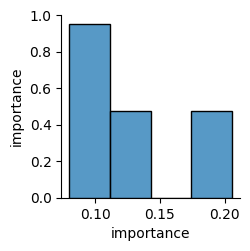

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(feature_importances_df)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'plas'),
  Text(1, 0, 'mass'),
  Text(2, 0, 'age'),
  Text(3, 0, 'pedi'),
  Text(4, 0, 'preg'),
  Text(5, 0, 'pres'),
  Text(6, 0, 'skin'),
  Text(7, 0, 'test')])

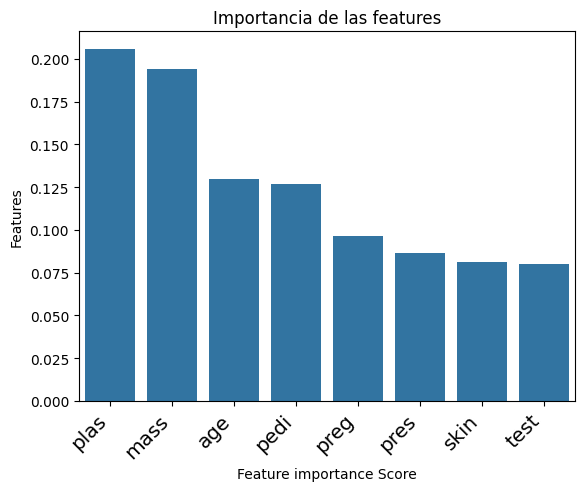

In [65]:
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel('Feature importance Score')
plt.ylabel('Features')
plt.title('Importancia de las features')
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**